In [1]:
from pycocotools.coco import COCO

ModuleNotFoundError: No module named 'pycocotools'

In [3]:
import matplotlib.pyplot as plt
import os

In [2]:
import json

In [5]:
with open("../../cell_data/standardmicroscopy/02annotated/annotations.json", 'r') as f:
    data = json.load(f)

In [11]:
data.keys()

dict_keys(['annotations', 'categories', 'images', 'info', 'licenses'])

In [10]:
data['images'][0]
len(data['images'])
len(data['annotations'])
data['annotations'][0]['image_id'] != data['images'][0]['id'] # image id target:
# pop entry from data['images'] if image_id != id


{'area': 116.5,
 'bbox': [167, 488, 24, 24],
 'category_id': 1,
 'id': 0,
 'image_id': 1,
 'iscrowd': 0,
 'segmentation': [[188,
   488,
   184,
   492,
   184,
   493,
   178,
   499,
   178,
   500,
   167,
   511,
   174,
   511,
   176,
   509,
   176,
   508,
   183,
   501,
   183,
   500,
   185,
   498,
   185,
   497,
   186,
   496,
   186,
   495,
   187,
   494,
   187,
   492,
   190,
   489,
   190,
   488]]}

In [7]:
coco = COCO(os.path.join("../../cell_data/standardmicroscopy/02annotated/annotations.json"))

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [12]:
for img in coco.imgs.keys():
    print(coco.imgs[img]['file_name'])
    if coco.imgs[img]['file_name'] == 'M2_Image279.jpg':
        problem_img = img
    

M2_Image100.jpg
M2_Image117.jpg
M2_Image140.jpg
M2_Image147.jpg
M2_Image20.jpg
M2_Image279.jpg
M2_Image29.jpg


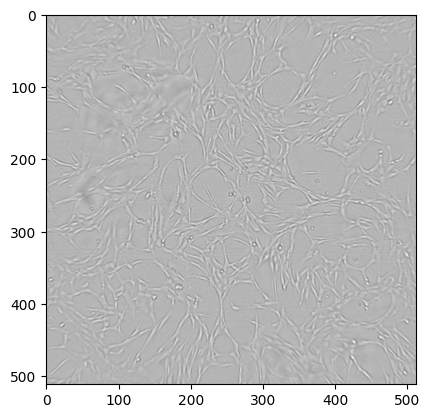

In [22]:
import cv2
img = "../../cell_data/standardmicroscopy/01preprocessed/512_512/M2_Image279.jpg"
img = cv2.imread(img)
# convert to plot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

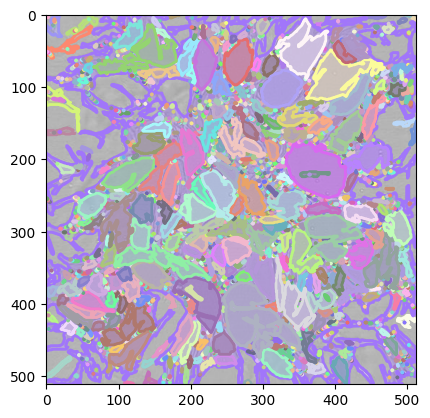

In [23]:
plt.imshow(img)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=problem_img, catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

In [18]:
img.shape

(1920, 1920, 3)

In [ ]:
def clean_coco(cocoobj):
    """clean coco file so that all annoations have an area > 80"""
    anns = cocoobj.anns
    for k in anns.keys():
        if anns[k]['area'] < 80:
            cocoobj.anns.pop(k)
            print(f'popped {k}, area: {anns[k]["area"]}')
    # save new file


In [3]:
import pycocotools.coco as COCO
coco = COCO.COCO("../../cell_data/standardmicroscopy/03_5augmented/512_512/12_coco_imglab.json")

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [4]:
anns = coco.anns

In [22]:
counter = 0
anns_out = anns.copy()
for k in anns.keys():
    if anns[k]['area'] < 20:
        # print(anns[k]['area'])
        counter += 1
        # remove ann
        anns_out.pop(k)

# save new json with fixed annotations
import json
with open('../../cell_data/standardmicroscopy/03_5augmented/512_512/12_coco_imglab.json', 'w') as fp:
    json.dump(anns_out, fp)

In [9]:
len(anns.keys())

371

In [ ]:
#Construct the binary mask
mask = coco.annToMask(anns[0])>0
for i in range(len(anns)):
     mask += coco.annToMask(anns[i])>0

plt.imshow(mask,cmap='gray')